In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2','#BEB8DC','#E7DAD2']
colors = ['#2878b5', '#c82423', '#800080', '#006400','#000000']
# 复古配色
# colors = ["#0780cf", "#765005", "#fa6d1d", "#0e2c82", "#b6b51f", "#da1f18", "#701866", "#f47a75", "#009db2", "#024b51", "#0780cf", "#765005"]
#新特色
# colors = ["#63b2ee", "#76da91", "#f8cb7f", "#f89588", "#7cd6cf", "#9192ab", "#7898e1", "#efa666", "#eddd86", "#9987ce", "#63b2ee", "#76da91"]
markers = ['*', 'o', 's', 'D','X']

plt_style = {
    'figure.autolayout' : True,
    'font.size' : 18,
    'lines.linewidth' : 2,
    'lines.markersize': 8,
    'xtick.labelsize' : 'medium',
    'ytick.labelsize' : 'medium',
    'legend.fontsize' : 'small',
    # 'axes.spines.top' : False,
    # 'axes.spines.right' : False,
    'xtick.labelsize' : 24,
    'ytick.labelsize' : 24,
    'xtick.major.size' : 6,
    'ytick.major.size' : 6,
    'legend.fontsize' : 16,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    # 'font.family': "Times New Roman"
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

In [3]:
point_number = 12
loaded_data = np.load('Figure/Fig2b.npz')
L2_error = loaded_data['L2_error']
time_consume = loaded_data['time_consume']
LIF_time, Izh_time, ML_time, WB_time = loaded_data['LIF_time'], loaded_data['Izh_time'], loaded_data['ML_time'], loaded_data['WB_time']
nmse_LIF, nmse_Izh, nmse_ML, nmse_WB = loaded_data['nmse_LIF'], loaded_data['nmse_Izh'], loaded_data['nmse_ML'], loaded_data['nmse_WB']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


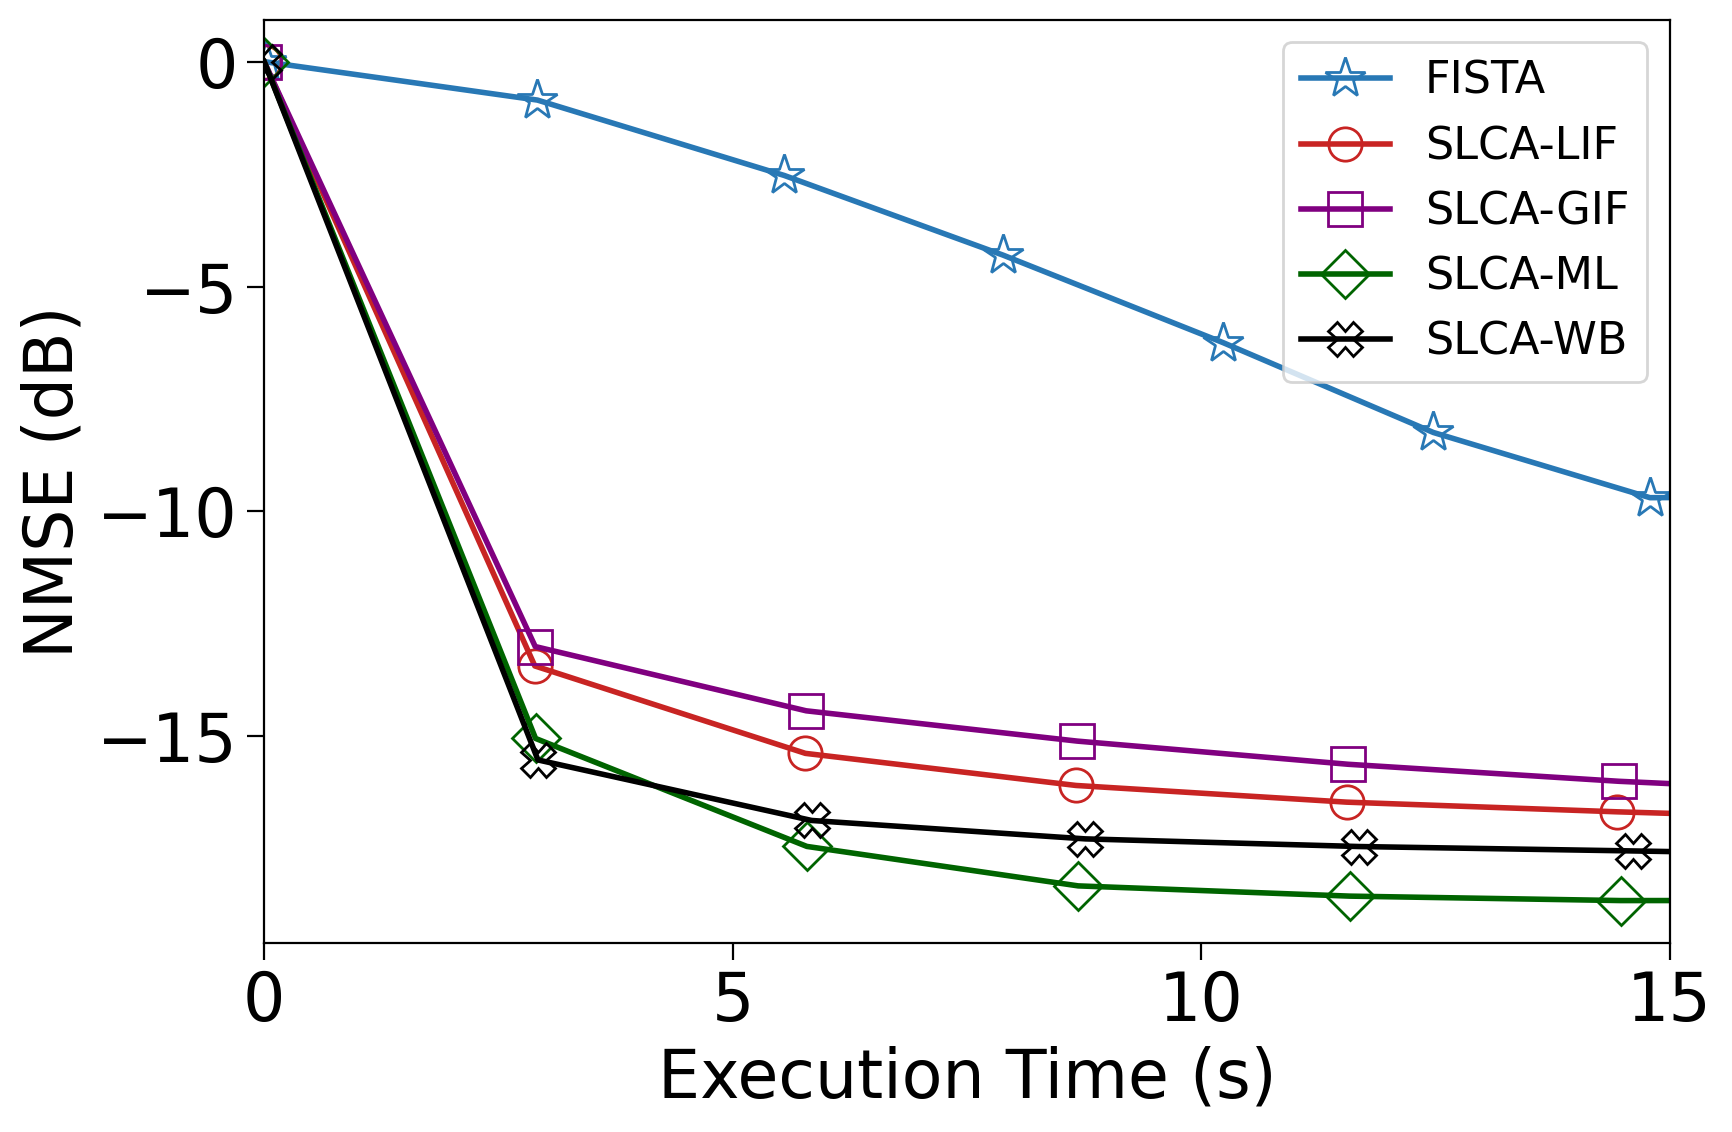

In [ ]:
    
interval = len(L2_error) // point_number
time_fista_plot = time_consume[::interval]
L2_error_half   = L2_error[:len(L2_error)*3//5]
L2_error_fista_plot = L2_error[::interval]

plt.plot(time_fista_plot, L2_error_fista_plot,  color=colors[0], marker=markers[0], markerfacecolor='none', label='FISTA', markersize=15)
plt.plot(LIF_time, nmse_LIF, color=colors[1], marker=markers[1], markerfacecolor='none', label='SLCA-LIF', markersize=12)
plt.plot(Izh_time, nmse_Izh,   color=colors[2], marker=markers[2], markerfacecolor='none', label='SLCA-GIF', markersize=12)
plt.plot(ML_time,  nmse_ML,   color=colors[3], marker=markers[3], markerfacecolor='none', label='SLCA-ML', markersize=12)
plt.plot(WB_time , nmse_WB,  color=colors[4], marker=markers[4], markerfacecolor='none', label='SLCA-WB', markersize=12)

plt.legend()
plt.xlim([0,15])
plt.xticks(np.arange(0, 16, 5))
plt.xlabel('Execution Time (s)')
plt.ylabel('NMSE (dB)')
plt.savefig('Figure/mult_neurons.eps', format='eps')
# plt.savefig('Figure/mult_neurons.pdf', format='pdf')
plt.savefig('Figure/multi_neurons.png', format='png')

In [5]:
dimension_value = np.power(2,np.arange(1, 6, 1)) * 1000
Fista_run_time = np.array([0.491035,0.689,1.279,2.923,7.674])/2.
LIF_run_time   = np.array([0.61,1.62,5.12, 28.4, 162.3])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


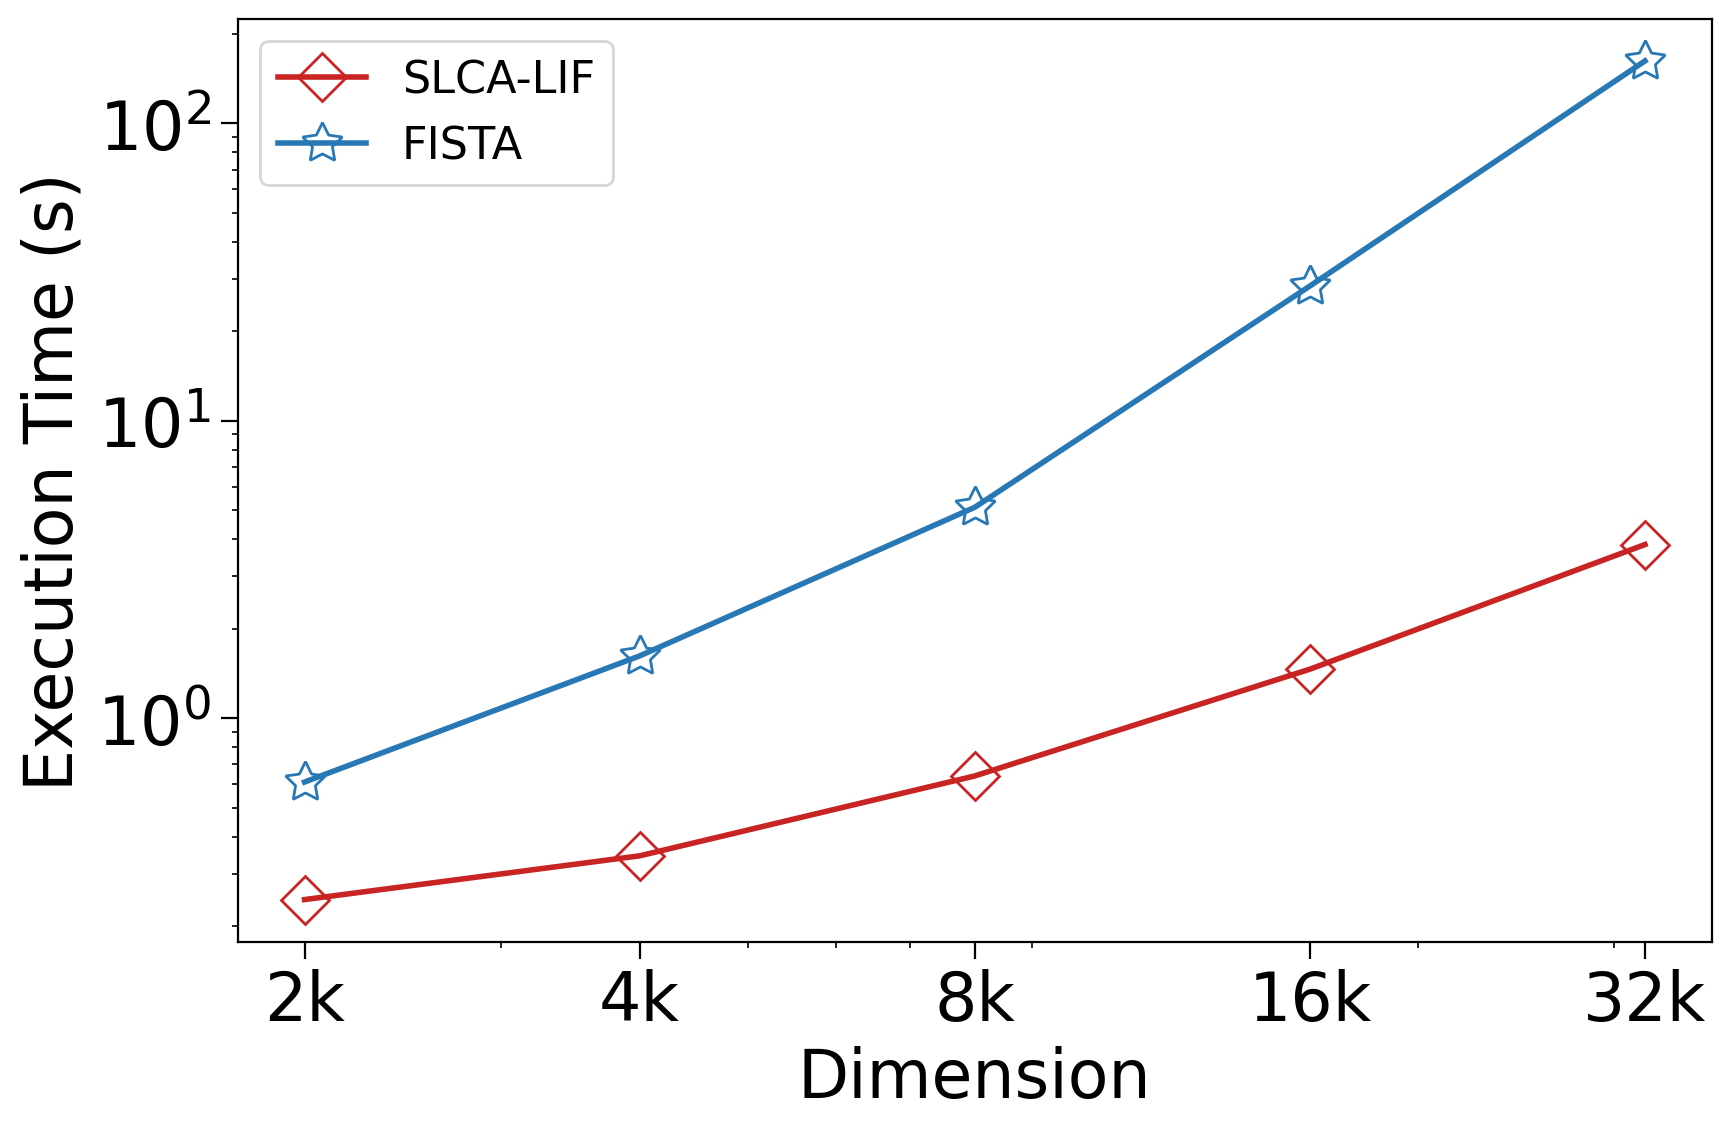

In [6]:
# colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2','#BEB8DC','#E7DAD2']
colors = ['#2878b5', '#9ac9db', '#f8ac8c', '#c82423','#ff8884']
markers = ['*', 'o', 's', 'D', '>']

# plt_style = {
#     'figure.autolayout' : True,
#     'font.size' : 18,
#     'lines.linewidth' : 3,
#     'xtick.labelsize' : 'medium',
#     'ytick.labelsize' : 'medium',
#     'legend.fontsize' : 'small',
#     # 'axes.spines.top' : False,
#     # 'axes.spines.right' : False,
#     # 'marker.size' : 10,
#     'xtick.labelsize' : 24,
#     'ytick.labelsize' : 24,
#     'xtick.major.size' : 6,
#     'ytick.major.size' : 6,
#     'legend.fontsize' : 18,
#     'axes.labelsize' : 24,
#     'axes.titlesize' : 24,
#     # 'font.family': "Times New Roman"
#     }
# for key, val in plt_style.items():
#     plt.rcParams[key] = val

# Select every other label for x-ticks


plt.semilogx(dimension_value, Fista_run_time, color=colors[-2], marker=markers[-2], markerfacecolor='none', label='SLCA-LIF', markersize=12)
plt.semilogx(dimension_value, LIF_run_time, color=colors[0], marker= (5,1), markerfacecolor='none', label='FISTA', markersize=15)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.xticks(dimension_value, [f'{int(x/1000)}k' for x in dimension_value])
# plt.ylim([-25,-10])
plt.xlabel('Dimension')
plt.ylabel('Execution Time (s)')
plt.savefig('Figure/Network_size.pdf', format='pdf')
plt.savefig('Figure/Network_size.eps', format='eps')
plt.savefig('Figure/Network_size.png', format='png')